In [40]:
import pandas as pd
import math
import numpy as np

## Importing the dataset

In [41]:
df = pd.read_csv("Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [42]:
# df['profit'] = df['Profit']
df.drop(columns=['Position'], axis=1,inplace=True)
# df.drop(columns=['Profit', 'State' , 'Administration',  'Marketing Spend' ], axis=1,inplace=True)
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [43]:
X = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

print((y))

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Classifying datasets into train and test

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Modelling the data

In [45]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
model = RandomForestRegressor(n_estimators=10)
model.fit(X, y)

RandomForestRegressor(n_estimators=10)

## Predicting the values

In [46]:
ypred = model.predict(X_test)
print(ypred)

[ 57500. 520000. 101000.]


In [47]:
print("Diffrence between Actual and Predicted Profit is : \n")
for i in range(len(ypred)):
    print(f"{y_test[i]} - {ypred[i]} = {math.floor(y_test[i] - ypred[i])}")

Diffrence between Actual and Predicted Profit is : 

60000 - 57500.0 = 2500
500000 - 520000.0 = -20000
110000 - 101000.0 = 9000


## Accuracy of the programme

In [48]:
from sklearn.metrics import r2_score

print(f'Accuracy: { r2_score(y_test, ypred) }')

Accuracy: 0.9958019816197587


## Visualizing the tree

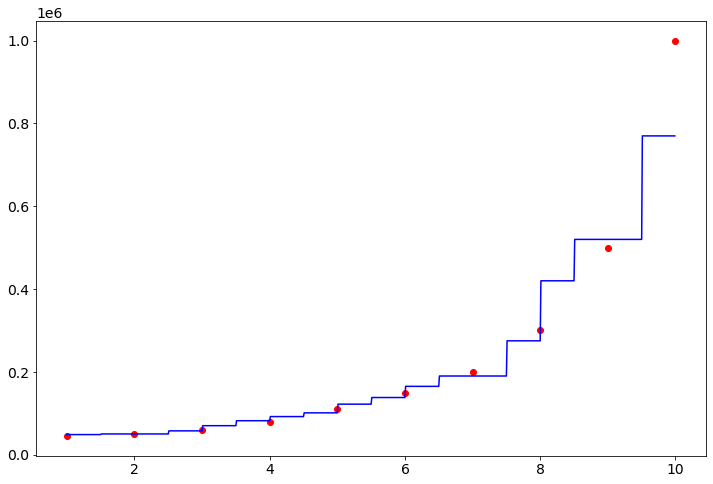

In [49]:
import matplotlib.pyplot as plt

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.show()

## Visualizing the Random Forest Tree

In [50]:
# len(model.estimators_)
# import matplotlib.pyplot as plt
# from sklearn import tree
# from dtreeviz.trees import dtreeviz # will be used for tree visualization
# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.rcParams.update({'font.size': 14})

In [51]:
# plt.figure(figsize=(20,20))
# _ = tree.plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)